# Task 1 @Bharat intern

### presented by HITENDRA KUMAR PATEL
### Task description: Stock Predicttion- Take stock price of a company and predicts it's price by using LSTM.
### my Linkedin id: https://www.linkedin.com/in/hitendra-kumar-patel-b74623226?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BGb8J3SA2S0K4eL9n9hxaCQ%3D%3D

### I'am choosing microsoft stock data for the stock prediction by using LSMT and also providing the data source link in below cell ~~~>

#### dataset from https://finance.yahoo.com/quote/MSFT/history/

In [2]:
import pandas as pd
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9459,2023-09-25,316.589996,317.670013,315.000000,317.540009,317.540009,17836000
9460,2023-09-26,315.130005,315.880005,310.019989,312.140015,312.140015,26297600
9461,2023-09-27,312.299988,314.299988,309.690002,312.790009,312.790009,19410100
9462,2023-09-28,310.989990,315.480011,309.450012,313.640015,313.640015,19683600


In [3]:
df = df[['Date','Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9459,2023-09-25,317.540009
9460,2023-09-26,312.140015
9461,2023-09-27,312.790009
9462,2023-09-28,313.640015


In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9459    2023-09-25
9460    2023-09-26
9461    2023-09-27
9462    2023-09-28
9463    2023-09-29
Name: Date, Length: 9464, dtype: object

In [5]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day = day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

###doing this to all the dates in the data

In [6]:
df['Date']= df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\HITENDRA\AppData\Local\Temp\ipykernel_20412\1066266531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9459   2023-09-25
9460   2023-09-26
9461   2023-09-27
9462   2023-09-28
9463   2023-09-29
Name: Date, Length: 9464, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-25,317.540009
2023-09-26,312.140015
2023-09-27,312.790009


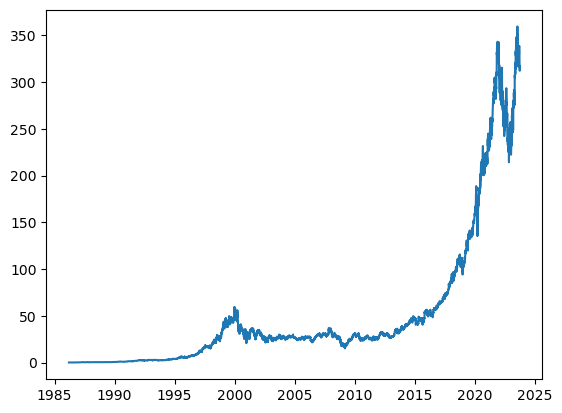

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [20]:
import numpy as np

def df_to_windowed_df(dataframe,first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2023-09-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
629,2023-09-25,320.769989,319.529999,317.010010,317.540009
630,2023-09-26,319.529999,317.010010,317.540009,312.140015
631,2023-09-27,317.010010,317.540009,312.140015,312.790009
632,2023-09-28,317.540009,312.140015,312.790009,313.640015


In [21]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((634,), (634, 3, 1), (634,))

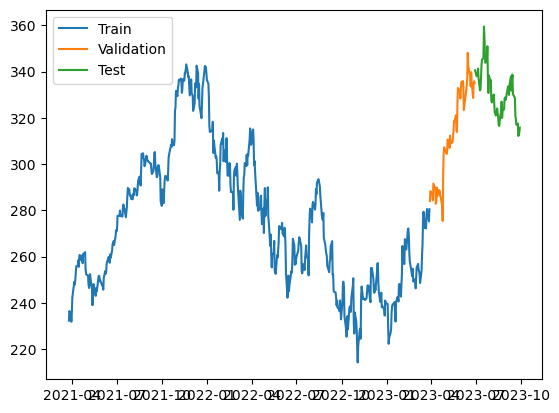

In [22]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 26ms/step - loss: 76078.1094 - mean_absolute_error: 274.2137 - val_loss: 97271.9531 - val_mean_absolute_error: 311.2473
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 75693.6406 - mean_absolute_error: 273.5139 - val_loss: 96747.2578 - val_mean_absolute_error: 310.4032
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 75046.6875 - mean_absolute_error: 272.3249 - val_loss: 95623.3516 - val_mean_absolute_error: 308.5873
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 73647.8594 - mean_absolute_error: 269.7469 - val_loss: 93286.1328 - val_mean_absolute_error: 304.7755
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 70729.5938 - mean_absolute_error: 264.2769 - val_loss: 89244.7812 - val_mean_absolute_error: 298.0734
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 67061.7891 - mean_absolute_error: 257.2334 - val_lo

16/16 [==============================] - 0s 3ms/step - loss: 35.7218 - mean_absolute_error: 4.6891 - val_loss: 34.6318 - val_mean_absolute_error: 4.7671
Epoch 50/100
16/16 [==============================] - 0s 4ms/step - loss: 45.0355 - mean_absolute_error: 5.3285 - val_loss: 71.0622 - val_mean_absolute_error: 6.7634
Epoch 51/100
16/16 [==============================] - 0s 4ms/step - loss: 38.5171 - mean_absolute_error: 4.9514 - val_loss: 38.9027 - val_mean_absolute_error: 4.7028
Epoch 52/100
16/16 [==============================] - 0s 4ms/step - loss: 34.0089 - mean_absolute_error: 4.5934 - val_loss: 37.3623 - val_mean_absolute_error: 4.9683
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 36.2356 - mean_absolute_error: 4.7348 - val_loss: 43.1860 - val_mean_absolute_error: 4.8726
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 38.3257 - mean_absolute_error: 4.9011 - val_loss: 50.3823 - val_mean_absolute_error: 5.4033
Epoch 55/100
16/1

16/16 [==============================] - 0s 2ms/step


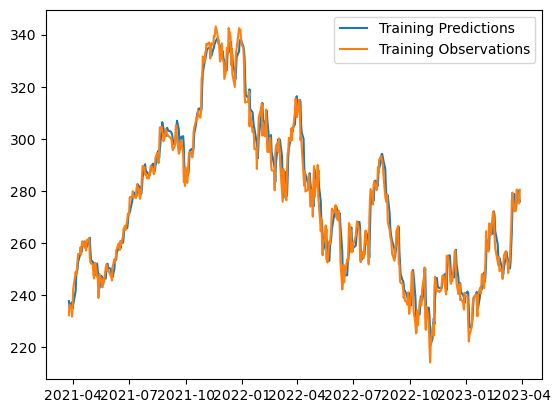

In [24]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 [==============================] - 0s 1ms/step


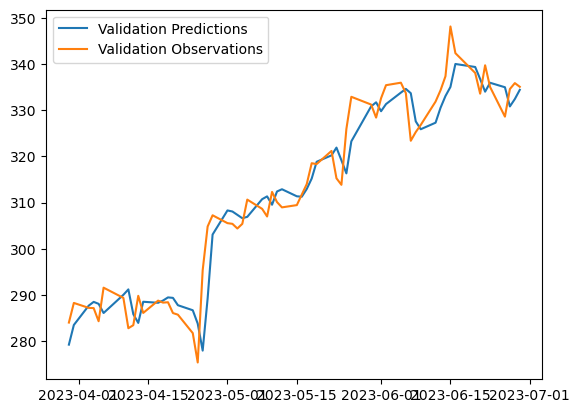

In [25]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 [==============================] - 0s 4ms/step


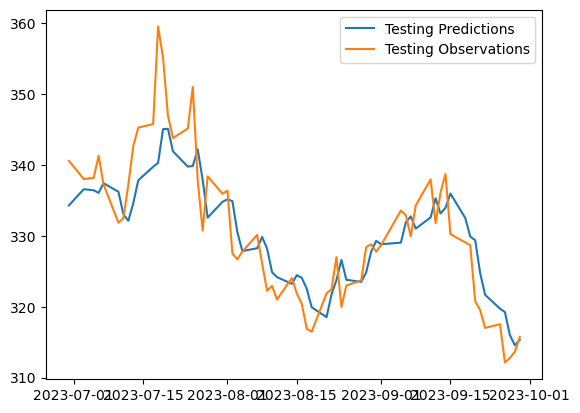

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

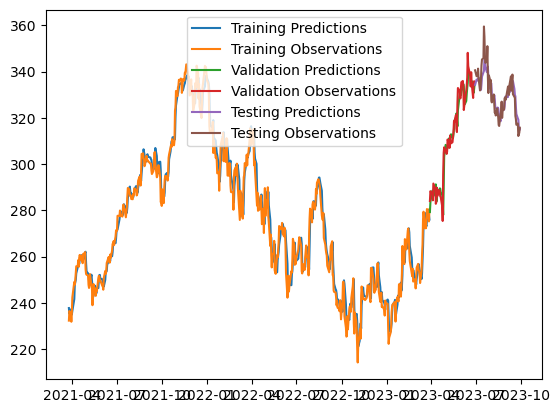

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

## Conclusion: We can see that the pridictions are very close to the actual observations.


## Thanks bharat intern !